# kNN predictor for Fisher Iris
Data Analysis - ISAE 2018/2019 - Gauthier Le Moulec

In [17]:
import os #path handling
import numpy as np #import numpy drives sklearn to use numpy arrays instead of python lists
import pandas as pd #CSV and dataframe handling
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier #kNN classifier
from sklearn.model_selection import train_test_split #Data set splitting functions
from sklearn.metrics import confusion_matrix #Confusion matrix

In [18]:
dataFile = 'coorectedIris.data'
print(dataFile)

coorectedIris.data


## 1 - Data import and formatting 

In [19]:
# we assign column names based on the description file. 'FType' stands for 'Flower Type'
fullDF = pd.read_csv(dataFile,header=None,names=['sepalL','sepalW','petalL','petalW','FType']) 
fullDF.sample(15) # let's take a random sample from the full data frame

,sepalL,sepalW,petalL,petalW,FType
116,6.5,3.0,5.5,1.8,Iris-virginica
16,5.4,3.9,1.3,0.4,Iris-setosa
121,5.6,2.8,4.9,2.0,Iris-virginica
39,5.1,3.4,1.5,0.2,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
143,6.8,3.2,5.9,2.3,Iris-virginica
123,6.3,2.7,4.9,1.8,Iris-virginica
65,6.7,3.1,4.4,1.4,Iris-versicolor
46,5.1,3.8,1.6,0.2,Iris-setosa
23,5.1,3.3,1.7,0.5,Iris-setosa


In [20]:
fullDF.describe() # quick statistical description of the dataframe

,sepalL,sepalW,petalL,petalW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
# Let's define a mapping function from 'Flower type' to a class number
def dataMap(FType):
  """
  Data mapping function. Assigns a class number, given a class name
  Args:
    FType: (str) Flower type
  Returns: (int) Flower class
  """
  mapping = {'Iris-versicolor': 0,
            'Iris-setosa': 1,
            'Iris-virginica': 2}
  return mapping[FType]

In [22]:
# Let's apply the mapping function to the input data and create a new column called 'Y'
fullDF['Y'] = [dataMap(item) for item in fullDF['FType']]

In [23]:
# Let's check that mapping works on a few random samples
fullDF.sample(10)

,sepalL,sepalW,petalL,petalW,FType,Y
79,5.7,2.6,3.5,1.0,Iris-versicolor,0
121,5.6,2.8,4.9,2.0,Iris-virginica,2
22,4.6,3.6,1.0,0.2,Iris-setosa,1
94,5.6,2.7,4.2,1.3,Iris-versicolor,0
112,6.8,3.0,5.5,2.1,Iris-virginica,2
40,5.0,3.5,1.3,0.3,Iris-setosa,1
72,6.3,2.5,4.9,1.5,Iris-versicolor,0
149,5.9,3.0,5.1,1.8,Iris-virginica,2
35,5.0,3.2,1.2,0.2,Iris-setosa,1
99,5.7,2.8,4.1,1.3,Iris-versicolor,0


In [24]:
# Separate data from classes
dataDF = fullDF[['sepalL','sepalW','petalL','petalW']]
classDF = fullDF['Y']

## 2 - Data splitting 

In [25]:
# Let's split the data into training data, and test data. Same splitting should be applied to classes.
# Here, the test data size is 20% of the full dataset
trainData,testData,trainY,testY = train_test_split(dataDF,classDF,test_size=0.2)

## 3 - kNN 

In [26]:
# Let's build a kd Tree out of our training data and use euclidian distance as a metric.
# This can be replaced by a custom metric
kNN = KNeighborsClassifier(n_neighbors=4,algorithm='kd_tree',metric='minkowski',p=2,n_jobs=-1)
kNN.fit(trainData,trainY)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='uniform')

In [27]:
# Check the classifier's performance on the training data
trainPredictions = kNN.predict(trainData)
trainCM = confusion_matrix(y_pred=trainPredictions,y_true=trainY)
print(trainCM)

[[39  0  2]
 [ 0 38  0]
 [ 4  0 37]]


In [30]:
kNN.score(trainData,trainY)

0.95

## 4 - Classifier performance 

In [28]:
# Check the classifier's performance on the test data
predictions = kNN.predict(testData)
testCM = confusion_matrix(y_pred=predictions,y_true=testY)
print(testCM)

[[ 9  0  0]
 [ 0 12  0]
 [ 0  0  9]]


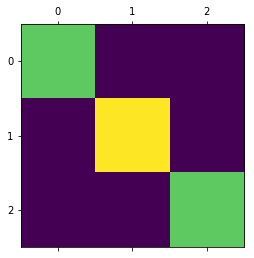

In [29]:
# You can also plot the confusion matrix
plt.matshow(testCM)